In [114]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [115]:
df = pd.read_csv('HistoricalPrices.csv')

In [116]:
df

,Date,Open,High,Low,Close,Volume
0,02/22/24,96.30,96.90,95.80,96.60,51805
1,02/21/24,96.50,96.50,94.30,94.60,42349
2,02/20/24,96.00,96.00,94.50,95.00,65557
3,02/19/24,96.90,96.90,94.00,94.70,106536
4,02/16/24,94.10,96.90,93.00,95.10,54827
...,...,...,...,...,...,...
4941,01/23/03,15.00,15.00,15.00,15.00,4338800
4942,01/21/03,15.25,15.25,15.25,15.25,865900
4943,01/20/03,15.50,15.50,15.50,15.50,990100
4944,01/16/03,15.50,15.50,15.50,15.50,3166000


## Data Preprocessing

In [117]:
df.shape

(4946, 6)

In [118]:
df.isna().sum()

Date       0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
dtype: int64

In [119]:
df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [120]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [121]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [122]:
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%y")
df['Date'].dtype

dtype('<M8[ns]')

In [123]:
df.sort_values(by='Date', inplace=True)

In [124]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-14,16.00,16.00,16.00,16.00,5190500
2003-01-16,15.50,15.50,15.50,15.50,3166000
2003-01-20,15.50,15.50,15.50,15.50,990100
2003-01-21,15.25,15.25,15.25,15.25,865900
2003-01-23,15.00,15.00,15.00,15.00,4338800


In [125]:
df = df[['Close']]
df.head()

,Close
Date,
2003-01-14,16.00
2003-01-16,15.50
2003-01-20,15.50
2003-01-21,15.25
2003-01-23,15.00


In [126]:
df.columns

Index(['Close'], dtype='object')

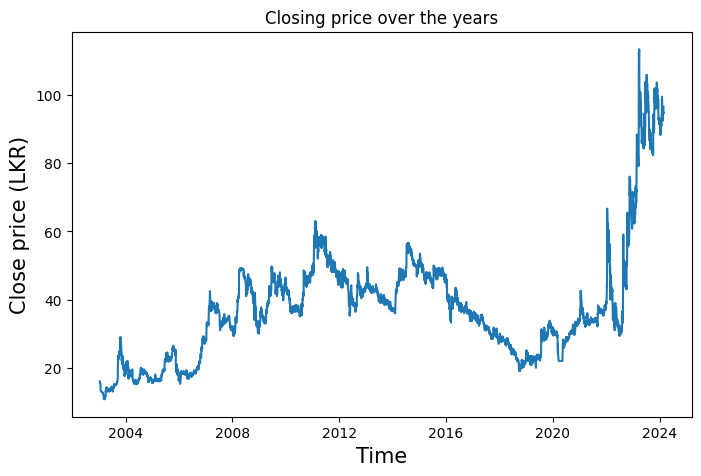

In [127]:
plt.figure(figsize=(8,5))
plt.title('Closing price over the years')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=15)
plt.ylabel('Close price (LKR)', fontsize=15)
plt.show()

### Scaling data

In [128]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [129]:
scaled_data.shape

(4946, 1)

In [130]:
scaled_data

array([[0.05109489],
       [0.04622871],
       [0.04622871],
       ...,
       [0.81995134],
       [0.81605839],
       [0.83552311]])

## Train-Test Split

In [131]:
train_size = int(len(scaled_data) * 0.8)  # 80% of the data for training
train_data = scaled_data[ :train_size]
train_size

3956

In [132]:
# split the data into x_train and y_trian dataset
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    # Append the previous 60 data points (from i-60 to i) as a sequence to x_train
    x_train.append(train_data[i-60:i,0])

    # Append the data point at index i as the target value to y_train
    y_train.append(train_data[i,0])

    # Print the x_train and y_train for the first iteration
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.05109489, 0.04622871, 0.04622871, 0.04379562, 0.04136253,
       0.02676399, 0.0243309 , 0.02189781, 0.02189781, 0.01946472,
       0.01946472, 0.01946472, 0.01946472, 0.01703163, 0.01703163,
       0.00729927, 0.        , 0.00729927, 0.00729927, 0.        ,
       0.00729927, 0.00243309, 0.00243309, 0.00243309, 0.00486618,
       0.00973236, 0.00729927, 0.01216545, 0.0243309 , 0.02189781,
       0.02676399, 0.03163017, 0.03163017, 0.02919708, 0.02919708,
       0.03406326, 0.03163017, 0.02919708, 0.02919708, 0.02676399,
       0.02676399, 0.0243309 , 0.0243309 , 0.02189781, 0.0243309 ,
       0.0243309 , 0.02919708, 0.02919708, 0.02919708, 0.0243309 ,
       0.0243309 , 0.0243309 , 0.0243309 , 0.0243309 , 0.02189781,
       0.02189781, 0.02189781, 0.02189781, 0.0243309 , 0.0243309 ])]
[0.02676399026763991]



In [133]:
# convert x_train & y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [134]:
# reshaping data into 3-Dimensional
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [135]:
x_train.shape

(3896, 60, 1)

# Model building

In [136]:
model = Sequential()
# add first layer to the model
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))

model.add(Dense(50))   # add Dense Layer to model with 50 neurons

model.add(Dense(1)) # add Dense Layer to model with 1 neuron

In [137]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model

In [138]:
model.fit(x_train, y_train,batch_size=64, epochs=10)

Epoch 1/10
61/61 [==============================] - 8s 63ms/step - loss: 0.0048
Epoch 2/10
61/61 [==============================] - 5s 80ms/step - loss: 2.3544e-04
Epoch 3/10
61/61 [==============================] - 4s 63ms/step - loss: 2.3023e-04
Epoch 4/10
61/61 [==============================] - 4s 62ms/step - loss: 2.1264e-04
Epoch 5/10
61/61 [==============================] - 5s 78ms/step - loss: 2.0851e-04
Epoch 6/10
61/61 [==============================] - 4s 62ms/step - loss: 1.9595e-04
Epoch 7/10
61/61 [==============================] - 4s 61ms/step - loss: 1.8955e-04
Epoch 8/10
61/61 [==============================] - 5s 76ms/step - loss: 1.7650e-04
Epoch 9/10
61/61 [==============================] - 4s 62ms/step - loss: 1.6720e-04
Epoch 10/10
61/61 [==============================] - 4s 60ms/step - loss: 1.6321e-04


## Testing Model

In [139]:
test_data = scaled_data[train_size-60: , : ]

# create x_test and y_test
x_test = []
y_test = df.values[train_size:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [140]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [141]:
# reshape the data to 3-Dimensional
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

### Predict stock prices for test set data

In [142]:
# predict prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

31/31 [==============================] - 2s 21ms/step


### Calculate the Root Mean Squared Error

In [143]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print("RMSE : ", round(rmse, 4))

RMSE :  1.3334


In [144]:
train = df[ :train_size]
validation_df = df[train_size: ]
validation_df['Predicted_Close'] = predictions

<ipython-input-144-7fe4d1ad2130>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df['Predicted_Close'] = predictions


In [145]:
validation_df

,Close,Predicted_Close
Date,,
2019-11-13,31.9,31.729486
2019-11-14,31.8,31.791689
2019-11-15,33.0,31.808653
2019-11-18,33.8,31.881714
2019-11-19,33.0,32.042557
...,...,...
2024-02-16,95.1,91.945610
2024-02-19,94.7,91.819916
2024-02-20,95.0,91.740883
